# Assigments 3.1

Quentin Le Roux

This first part of the assignment requires to implement yourself basic cross-validation strategies.

In [1]:
# Library imports

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

<hr>

## Exercise 1

Define a 10-fold classification strategy to test the accuracy of a Linear Discriminant Analysis (LDA) classifier for the data created as follows:

In [2]:
# Global variable declaration

folds = 10
n_samples = 100
n_features = 2

In [3]:
# Dataset generation

X, y = make_classification(n_samples=n_samples, 
                           n_features=n_features, 
                           n_redundant=0, 
                           n_informative=2,
                           random_state=0, 
                           n_clusters_per_class=1, 
                           weights = [0.5])

We test a simple LDA analysis with a 10-fold cross-validation analysis as a preamble.

In [4]:
# Model declaration & Cross-Validation process

model = LinearDiscriminantAnalysis()
sklearn_accuracy = cross_val_score(model, 
                                   X, y, 
                                   scoring = 'accuracy', 
                                   cv=folds)

In [5]:
# Prints results

print(f"The accuracies yielded by a {folds}-fold cross-validation process are:",
      f"{sklearn_accuracy}", sep="\n")
print(f"\nThe average accuracy yielded by a {folds}-fold cross validation process is:",
      f"{np.mean(sklearn_accuracy):.2f}", sep="\n")

The accuracies yielded by a 10-fold cross-validation process are:
[0.9 1.  1.  0.9 1.  1.  1.  1.  0.9 0.7]

The average accuracy yielded by a 10-fold cross validation process is:
0.94


Next, given a 10-fold cross validation, we are looking for the best mix of hyperparameters for the LDA model. As such, we perform a grid search over the model.

In [6]:
# Global variable declaration

solvers = ["svd", "lsqr", "eigen"]
n_components = [None] + list(range(n_features))
n_items = np.array(list(range(len(solvers)*len(n_components))))

Mean_Acc = []
Std_Acc = []

In [7]:
# Pseudo-Grid Search over solver and n_component parameters

for solv in solvers:
    for comp in n_components:
        # Model declaration
        model = LinearDiscriminantAnalysis(solver=solv, 
                                           n_components=comp)
        # Computes cross-validation accuracies
        sklearn_accuracy = cross_val_score(model, 
                                           X, y, 
                                           scoring = 'accuracy', 
                                           cv=folds)
        # Records results
        Mean_Acc.append(np.mean(sklearn_accuracy))
        Std_Acc.append(np.sqrt(np.var(sklearn_accuracy)))

# Formats
Mean_Acc = np.asarray(Mean_Acc)
Std_Acc = np.asarray(Std_Acc)

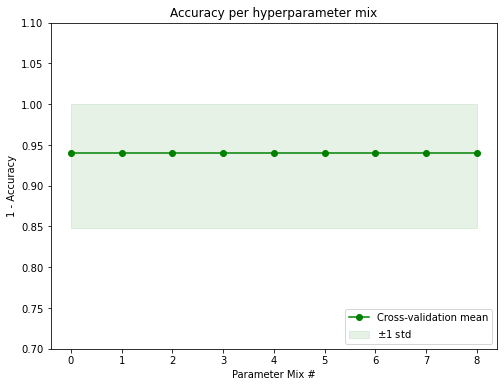

In [8]:
#Plots results

fig = plt.figure(figsize=(8,6))

plt.fill_between(n_items, 
                 Mean_Acc - Std_Acc,
                 1, #Accuracy cannot go above 1
                 alpha=0.1, 
                 color="g", 
                 label = '$\pm 1$ std')

plt.plot(n_items, 
         Mean_Acc, 
         'o-', 
         color="g",
         label="Cross-validation mean")

plt.ylim(0.7,1.1)
plt.ylabel('1 - Accuracy')
plt.xlabel('Parameter Mix #')

plt.legend(loc="lower right")
plt.title('Accuracy per hyperparameter mix')

plt.show()

We see that for all hyperparameter mixes, we get the same results.

<hr>

## Exercise 2

Use the previous 10-fold cross-validation to plot and compute the average area under the curve of the LDA classifier. You can use the built in method *predict_proba(X)*

In [9]:
# Global variable declaration

roc_sample = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

In [10]:
# Model declaration

model = LinearDiscriminantAnalysis()

We remark that we may be facing a case of unbalanced dataset when performing a train-test split. As such k-fold cross-validation may pose problems of biased accuracy quantification.

In [11]:
# Testing consistent split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print("*** Training ***")
print("Elements of class 0: " + str(np.sum(y_train==0)/len(y_train)))
print("Elements of class 1: " + str(np.sum(y_train==1)/len(y_train)))

print("\n*** Testing ***")
print("Elements of class 0: " + str(np.sum(y_test==0)/len(y_test)))
print("Elements of class 1: " + str(np.sum(y_test==1)/len(y_test)))

print("\n*** Training + Testing ***")
print("Elements of class 0: " + str(np.sum(y==0)/len(y)))
print("Elements of class 1: " + str(np.sum(y==1)/len(y)))

*** Training ***
Elements of class 0: 0.52
Elements of class 1: 0.48

*** Testing ***
Elements of class 0: 0.48
Elements of class 1: 0.52

*** Training + Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5


The classes are not equally represented in in the dataset (and especially between potential training and testing sets). 

This will likely carry over to any type of Training and Testing split. This may pose a problem in the evaluation of our LDA model as the performance is not evaluated on data with same distribution. 

For this reason, we would like to keep the proportion of classes constant across data split. This operation is called stratified k-fold.

In [12]:
# Testing consistent split using SKF

skf = StratifiedKFold(n_splits=folds)
for idx, (train, test) in enumerate(skf.split(X, y)):
    print(f"\n##### Example with fold-mix #{idx} #####")
    print("\n*** Training ***")
    print("Elements of class 0: " + str(np.sum(y[train]==0)/len(y[train])))
    print("Elements of class 1: " + str(np.sum(y[train]==1)/len(y[train])))
    print("*** Testing ***")
    print("Elements of class 0: " + str(np.sum(y[test]==0)/len(y[test])))
    print("Elements of class 1: " + str(np.sum(y[test]==1)/len(y[test])))


##### Example with fold-mix #0 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #1 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #2 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #3 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #4 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 0: 0.5
Elements of class 1: 0.5

##### Example with fold-mix #5 #####

*** Training ***
Elements of class 0: 0.5
Elements of class 1: 0.5
*** Testing ***
Elements of class 

In [13]:
# StratifiedKFold strategy object declaration

cv = StratifiedKFold(n_splits=folds)

Test Accuracy Scores for each fold using the StratifiedKFold method:

0-Fold Test Accuracy Score: 0.90
1-Fold Test Accuracy Score: 1.00
2-Fold Test Accuracy Score: 1.00
3-Fold Test Accuracy Score: 0.90
4-Fold Test Accuracy Score: 1.00
5-Fold Test Accuracy Score: 1.00
6-Fold Test Accuracy Score: 1.00
7-Fold Test Accuracy Score: 1.00
8-Fold Test Accuracy Score: 0.90
9-Fold Test Accuracy Score: 0.70

AUC plot:


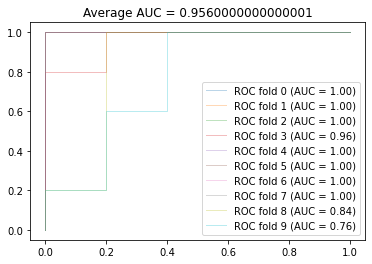

In [14]:
# Cross-validation loop: runs LDA with cross-validation and plot ROC curves
# Loops over the cross-validation folds

print("Test Accuracy Scores for each fold using the StratifiedKFold method:\n")

for train, test in cv.split(X, y):
    # Computes the predictions
    predictions = model.fit(X[train], y[train]).predict_proba(X[test])
    # Computes the ROC and AUC data
    fpr, tpr, thresholds = roc_curve(y[test], predictions[:, 1])
    roc_sample.append(np.interp(mean_fpr, fpr, tpr))
    # ROC curve is set to start at 0
    roc_sample[-1][0] = 0.0
    # Computes the AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plots the AUC
    plt.plot(fpr, tpr, 
             lw=1, alpha=0.3,
             label=f"ROC fold {i} (AUC = {roc_auc:.2f})")
    # Prints the Accuracy score
    acc = accuracy_score(y[test], model.predict(X[test]))
    print(f"{i}-Fold Test Accuracy Score: {acc:.2f}")
    i += 1

print("\nAUC plot:")
plt.legend()
plt.title("Average AUC = " + str(np.mean(aucs)))
plt.show()

We summarize the cross-validation results using a Receiving Operator Characteristic (ROC) curve.

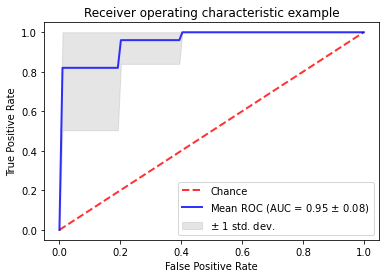

In [15]:
# Summarizes the cross-validation results

# Adds diagonal line of random classification 
plt.plot([0, 1], [0, 1], 
         linestyle='--', 
         lw=2, 
         color='r',
         label='Chance', 
         alpha=.8)

# Computes mean and std for the curves
mean_tpr = np.mean(roc_sample, axis=0)
std_tpr = np.std(roc_sample, axis=0)

# Sets the end point of the average ROC to be equal to 1
mean_tpr[-1] = 1.0

# Computes the AUC of the average curves
mean_auc = auc(mean_fpr, mean_tpr)

# Computes the std of the AUCs 
std_auc = np.std(aucs)

# Plots the ROC curve
plt.plot(mean_fpr, 
         mean_tpr, 
         color='b',
         label=f"Mean ROC (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})",
         lw=2, 
         alpha=.8)


# Plots the std
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, 
                 tprs_lower, 
                 tprs_upper, 
                 color='grey', 
                 alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<hr>

## Exercise 3

Define the appropriate cross-validation strategy and measurement of the area under the curve for the data:

In [16]:
# Global variable declaration

n_samples = 200
n_features = 5

means = [] 
stdevs = []

fold_range = np.array(list(range(2,
                                 min(np.sum(y == 0), 
                                     np.sum(y == 1)))))

roc_sample = [[],[]]
aucs = [[],[]]
mean_fpr = np.linspace(0, 1, n_samples)

In [17]:
# Dataset generation

X, y = make_classification(n_samples=n_samples, 
                           n_features=n_features, 
                           n_redundant=0, 
                           n_informative=3,
                           random_state=0, 
                           n_clusters_per_class=1, 
                           weights = [0.9])

We remark that we may be facing a case of unbalanced dataset when performing a train-test split. As such k-fold cross-validation may pose problems of biased accuracy quantification.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("*** Training ***")
print("Elements of class 0: " + str(np.sum(y_train==0)/len(y_train)))
print("Elements of class 1: " + str(np.sum(y_train==1)/len(y_train)))

print("\n*** Testing ***")
print("Elements of class 0: " + str(np.sum(y_test==0)/len(y_test)))
print("Elements of class 1: " + str(np.sum(y_test==1)/len(y_test)))

print("\n*** Training + Testing ***")
print("Elements of class 0: " + str(np.sum(y==0)/len(y)))
print("Elements of class 1: " + str(np.sum(y==1)/len(y)))

*** Training ***
Elements of class 0: 0.9125
Elements of class 1: 0.0875

*** Testing ***
Elements of class 0: 0.875
Elements of class 1: 0.125

*** Training + Testing ***
Elements of class 0: 0.905
Elements of class 1: 0.095


The classes are not equally represented in in the dataset (and especially between potential training and testing sets). 

This will likely carry over to any type of Training and Testing split. This may pose a problem in the evaluation of our LDA model as the performance is not evaluated on data with same distribution. 

For this reason, we would like to keep the proportion of classes constant across data split. This operation is called stratified k-fold.

In [19]:
skf = StratifiedKFold(n_splits=folds)

for idx, (train, test) in enumerate(skf.split(X, y)):
    print(f"\n##### Example with fold-mix #{idx} #####")
    print("\n*** Training ***")
    print("Elements of class 0: " + str(np.sum(y[train]==0)/len(y[train])))
    print("Elements of class 1: " + str(np.sum(y[train]==1)/len(y[train])))
    print("*** Testing ***")
    print("Elements of class 0: " + str(np.sum(y[test]==0)/len(y[test])))
    print("Elements of class 1: " + str(np.sum(y[test]==1)/len(y[test])))


##### Example with fold-mix #0 #####

*** Training ***
Elements of class 0: 0.9
Elements of class 1: 0.1
*** Testing ***
Elements of class 0: 0.95
Elements of class 1: 0.05

##### Example with fold-mix #1 #####

*** Training ***
Elements of class 0: 0.9055555555555556
Elements of class 1: 0.09444444444444444
*** Testing ***
Elements of class 0: 0.9
Elements of class 1: 0.1

##### Example with fold-mix #2 #####

*** Training ***
Elements of class 0: 0.9055555555555556
Elements of class 1: 0.09444444444444444
*** Testing ***
Elements of class 0: 0.9
Elements of class 1: 0.1

##### Example with fold-mix #3 #####

*** Training ***
Elements of class 0: 0.9055555555555556
Elements of class 1: 0.09444444444444444
*** Testing ***
Elements of class 0: 0.9
Elements of class 1: 0.1

##### Example with fold-mix #4 #####

*** Training ***
Elements of class 0: 0.9055555555555556
Elements of class 1: 0.09444444444444444
*** Testing ***
Elements of class 0: 0.9
Elements of class 1: 0.1

##### Example

Given this observation, we need to devise a k-fold cross validation strategy that can perform on such an imbalanced dataset (along with its potentially imbalanced fold-splits).

In [20]:
# Model declaration & Cross-Validation process

print("##### Mean test accuracies per fold #####")
print("### (with Stratified K-Fold strategy) ###\n")

for k in fold_range:
    
    # Resets list at start of loop
    accuracies_within_fold = []
    
    # Declares the stratified folding
    skf = StratifiedKFold(n_splits=k)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Fit model on X_train
        model = LinearDiscriminantAnalysis()
        model.fit(X_train,y_train)

        #Store each Kfold accuracy values on X_test
        accuracies_within_fold.append(accuracy_score(y_test, model.predict(X_test)))
    
    print(f"{k}-fold cross-validation score: {np.mean(accuracies_within_fold):.2f}")
    
    #Average and std for a particular k fold
    means.append(np.mean(accuracies_within_fold))
    stdevs.append(np.sqrt(np.var(accuracies_within_fold, ddof = 1)))


# Formats
means  = np.asarray(means)
stdevs  = np.asarray(stdevs)

##### Mean test accuracies per fold #####
### (with Stratified K-Fold strategy) ###

2-fold cross-validation score: 0.97
3-fold cross-validation score: 0.97
4-fold cross-validation score: 0.97
5-fold cross-validation score: 0.97
6-fold cross-validation score: 0.97
7-fold cross-validation score: 0.97
8-fold cross-validation score: 0.97
9-fold cross-validation score: 0.97
10-fold cross-validation score: 0.97
11-fold cross-validation score: 0.97
12-fold cross-validation score: 0.97
13-fold cross-validation score: 0.97
14-fold cross-validation score: 0.97
15-fold cross-validation score: 0.97
16-fold cross-validation score: 0.97
17-fold cross-validation score: 0.97
18-fold cross-validation score: 0.97
19-fold cross-validation score: 0.97
20-fold cross-validation score: 0.97
21-fold cross-validation score: 0.97
22-fold cross-validation score: 0.97
23-fold cross-validation score: 0.97
24-fold cross-validation score: 0.97
25-fold cross-validation score: 0.97
26-fold cross-validation score: 0.9

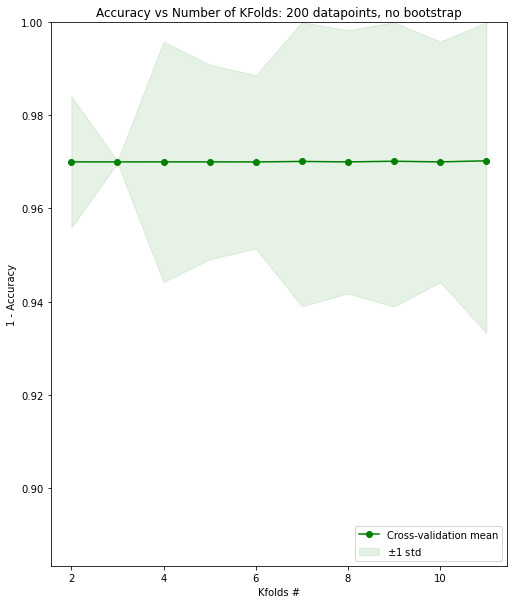

In [21]:
#Plots results for the first 20 folds

fig = plt.figure(figsize=(18,10))
fig.add_subplot(1, 2, 1)

plt.fill_between(fold_range[:10], 
                 means[:10] - stdevs[:10],
                 np.array(list(map(lambda x: 1 if x>1 else x,
                                   means[:10] + stdevs[:10]))), #Accuracy cannot go above 1
                 alpha=0.1, 
                 color="g", 
                 label = '$\pm 1$ std')

plt.plot(fold_range[:10], 
         means[:10], 
         'o-', 
         color="g",
         label="Cross-validation mean")

plt.ylim(min(means[:10] - stdevs[:10])-0.05,1)
plt.ylabel('1 - Accuracy')
plt.xlabel('Kfolds #')

plt.legend(loc="lower right")
plt.title('Accuracy vs Number of KFolds: 200 datapoints, no bootstrap')

plt.show()

We choose to study the ROC of the Stratified K-Fold method using the 3-fold and 6-fold cases, which yielded the lowest standard deviation besides the 2-fold case (which is equivalent to the Train-Test split).

Test Accuracy Scores for each fold using the StratifiedKFold method:


Test Accuracy Scores with the StratifiedKFold method using 3 folds:

1-Fold Test Accuracy Score: 0.97
2-Fold Test Accuracy Score: 0.97
3-Fold Test Accuracy Score: 0.97

Test Accuracy Scores with the StratifiedKFold method using 6 folds:

1-Fold Test Accuracy Score: 0.94
2-Fold Test Accuracy Score: 1.00
3-Fold Test Accuracy Score: 0.97
4-Fold Test Accuracy Score: 0.97
5-Fold Test Accuracy Score: 0.97
6-Fold Test Accuracy Score: 0.97

AUC plot:


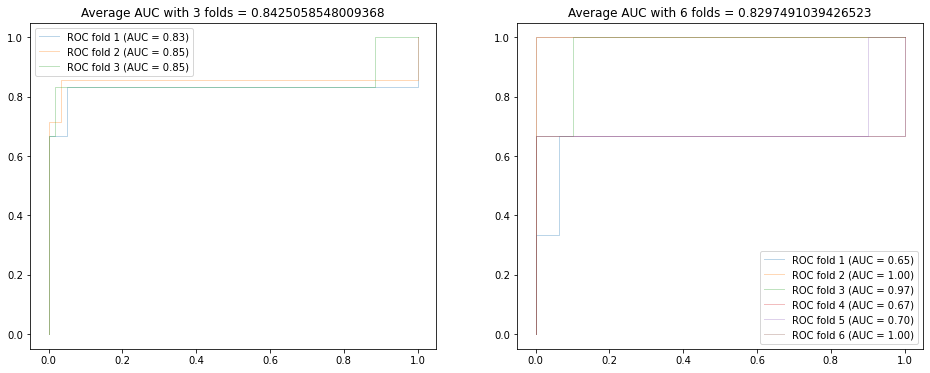

In [22]:
print("Test Accuracy Scores for each fold using the StratifiedKFold method:\n")

fig = plt.figure(figsize=(16,6))

for idx, fold in enumerate([3, 6]):
    print(f"\nTest Accuracy Scores with the StratifiedKFold method using {fold} folds:\n")
    # we declare our StratifiedKFold strategy
    cv = StratifiedKFold(n_splits=fold)
    i=0
    # Cross-validation loop: runs LDA with cross-validation and plot ROC curves
    # Loops over the cross-validation folds
    for train, test in cv.split(X, y):
        # Computes the predictions
        predictions = model.fit(X[train], y[train]).predict_proba(X[test])
        # Compute the ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y[test], predictions[:, 1])
        roc_sample[idx].append(np.interp(mean_fpr, fpr, tpr))
        # ROC curve is set to start at 0
        roc_sample[idx][-1][0] = 0.0
        # Compute the AUC
        roc_auc = auc(fpr, tpr)
        aucs[idx].append(roc_auc)
        # Plots the AUC
        plt.subplot(1,2,idx+1)
        plt.plot(fpr, tpr, 
                 lw=1, alpha=0.3,
                 label=f"ROC fold {i+1} (AUC = {roc_auc:.2f})")
        plt.legend()
        plt.title(f"Average AUC with {fold} folds = {np.mean(aucs[idx])}")
        i += 1
        # Prints the Accuracy score
        acc = accuracy_score(y[test], model.predict(X[test]))
        print(f"{i}-Fold Test Accuracy Score: {acc:.2f}")

print("\nAUC plot:")
    
plt.legend()
plt.show()

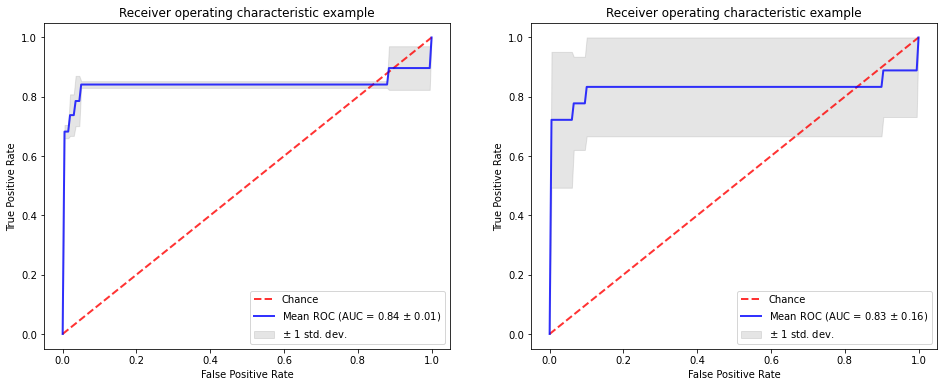

In [23]:
# Summarizes the cross-validation results

fig = plt.figure(figsize=(16,6))

for idx in [0, 1]:
    # Adds diagonal line of random classification 
    plt.subplot(1,2,idx+1)
    plt.plot([0, 1], 
             [0, 1], 
             linestyle='--', 
             lw=2, 
             color='r',
             label='Chance', 
             alpha=.8)

    # Computes mean and std for the curves
    mean_tpr = np.mean(roc_sample[idx], axis=0)
    std_tpr = np.std(roc_sample[idx], axis=0)

    # Sets the end point of the average ROC to be equal to 1
    mean_tpr[-1] = 1.0

    # Computes the AUC of the average curves
    mean_auc = auc(mean_fpr, mean_tpr)
    
    # Computes the std of the AUCs 
    std_auc = np.std(aucs[idx])
    
    # Plots the ROC curve
    plt.plot(mean_fpr, 
             mean_tpr, 
             color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, 
             alpha=.8)


    # Plots the std
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

plt.show()

A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers. A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR). The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)). Similarly, the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test. [[source](https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/)]

<u>Observation:</u>

As such, we see that we have a strongly performing model (in terms of TPR-FPR trade off) with the 3-fold and 6-fold strategies (the latter having a higher trade-off variance) until we hit around a 80%+ TPR. 

Once the 80%+ TPR is reached, the trade-off drops dramatically, even going lower than the 45-degree diagonal. Since the FPR explodes after this tipping point, we can emit the hypothesis that the model (LDA in our case) is linearly overfitting one class over the other. 

This seems to indicate that our model hits a limit in performance that might be solved either by hyperparameter tuning, or swapping for another class of classifiers which may be able to display and predict more complex features.

## Assigments 3.2

__Exercise 1.__ During lesson we discussed the problem of _selection bias_ in cross-validation. 
This problem is nicely investigated in the paper *On the Dangers of Cross-Validation. An Experimental Evaluation*, accessible here:

http://people.csail.mit.edu/romer/papers/CrossVal_SDM08.pdf


Read  
- Section 1 (Introduction), 
- Section 4 (Experiments on Synthetic Data), 
- Section 7 (Discussion)

And write a short summary (~half a page) about these three sections (results and take home message).



<hr>

**word count**: 

In [1]:
10**6


1000000

The goal of any classifier is to learn generalized features from a given [training] dataset in order to perform accurate prediction on yet unseen content. The issue often happens in the procurement of this test data. This led statisticians to develop techniques that rely on training data to increase the robustness of their models and their training.
 
One such technique is cross-validation (CV), a method that belongs to the larger class of solutions called resembling methods. CV allows to perform robust training for a given model, but also provides a good comparator for models within the same class. With CV, a model is trained on a subset of the data available, and validated on the left-out rest. This approach has empirical backing and is a mainstay of the industry. Furthermore, the advent of big data and the increase in computation capacity allowed for using resampling methods on large datasets, expanding performance and application at the same time.
 
CV has pitfalls, however. It can be abused/overfitting, which led to extended heuristics. CV is not a theoretical close-case, and there is a point at which it can no longer be used for model comparison: when the number of algorithms to compare is large, and when dimensionality increases. The paper wants to provide an example of this shortfall.
 
216
 
The paper relies on synthetic data with a set true error of $\frac{1}{2}$. The goal is to be able to precisely monitor the accuracy of a cross-validation process, using $1-CVerror$. The iterative comparison process relies on drawing datasets from the synthetic distribution and pit $M$ algorithms against each other by comparing their Leave-One-Out (LOO) error, empirically selecting the best ones after an average of three iterations.
 
The first observation highlights that as the number of algorithms increases, the best cross-validation score increases as well (from $61.9$ with $10$ models, to $85.6$ with $1000000$ models). However, we would expect a good model to approach the true error $0.5$. Instead we end up selecting the algorithms that overestimates the true accuracy the most. The same observation is done when dimensionality is increased. The LOO accuracy increases along with it, showing an overestimating behavior similar to the first observation.
 
As such an accuracy overestimating behavior can be found to increase proportionally with the number of learning algorithms, data size, and dimensionality (increasing model complexity increases the likelihood of overfitting the data). 
 
A similar behavior is observed with regards to feature selection when using cross-validation. For small datasets, CV accuracy increases when selecting an increasing amount of redundant features, albeit this is less so the case for large datasets.  Similarly, having access to an increasing amount of features to draw from leads to overestimating the CV accuracy. These behaviors were observed with only 1 model. 
 
246
 
Empirically using synthetic data as well as some benchmark and real-life datasets (e.g. clinical data), the paper confirms that a Leave-One-Out Cross-Validation technique may become ineffective; it would fail at generalizing. This is observed in a multitude of cases such as increasing the sample size, the data dimensionality, the number of selected features, or the number of algorithms at hand.
 
The paper calls itself a warning call for the industry, pinpointing with an empirical underpinning a known phenomenon that lacked proper demonstration.
 
The authors’ take is that the amount of data used for the process has a key impact on the end generalization error. The way cross-validation is set will lead to a larger variance in the error as predictions will have a higher risk of being unreliable.
 
To remedy this behavior, the authors offer to have a so-called sequestered test set that can be used after a training process using a cross-validation process. The goal is to check whether the error on the validation and test set are close. Scientists should be wary of selecting out models that excels on training data as well as selecting too many features. Finally, a note of caution is to not perform selection by using the test set as scientists would run the risk to no longer be in the case of generalizing in the case of real-world setting.


The goal of any classifier is to learn generalized features from a given dataset and perform accurate prediction on yet unseen data. The procurement of this test data is often problematic. As such, statisticians developed techniques relying on training data to increase their model’s robustness.
 
One such method is cross-validation (CV). It belongs to a larger class of solutions: resampling methods. With CV, a model is trained on a subset of the available data, then validated on the rest.  This approach is a mainstay in industry as it is considered a good comparator for models while enabling robust training. 
 
Or so it is thought. CV can overfit dramatically. It is not a theoretical close-case and can fail at model comparison. The paper wants to provide an example of this shortfall.
 
The paper relies on synthetic data with a $\frac{1}{2}$ true error with the goal of monitoring changes the error of a Leave-One-Out (LOO) cross-validation, depending on varying parameters. The iterative process relies on drawing sets from the synthetic distribution and comparing the error of $M$ algorithms, empirically selecting the best ones with a 3-iteration mean.
 
The first observation highlights that as the number of algorithms increases, the best cross-validation score increases as well (from $61.9$ with $10$ models, to $85.6$ with $1000000$ models). However, we would expect a good model to approach the true error $0.5$. Instead we end up selecting the algorithms that overestimates the true accuracy the most. The same observation is done when dimensionality is increased. The LOO accuracy increases along with it, showing an overestimating behavior similar to the first observation.
 
As such an accuracy overestimating behavior can be found to increase proportionally with the number of learning algorithms, data size, and dimensionality (increasing model complexity increases the likelihood of overfitting the data). 
 
A similar behavior is observed with regards to feature selection when using cross-validation. For small datasets, CV accuracy increases when selecting an increasing amount of redundant features, albeit this is less so the case for large datasets.  Similarly, having access to an increasing amount of features to draw from leads to overestimating the CV accuracy. These behaviors were observed with only 1 model. 
 
246
 
Empirically using synthetic data as well as some benchmark and real-life datasets (e.g. clinical data), the paper confirms that a Leave-One-Out Cross-Validation technique may become ineffective; it would fail at generalizing. This is observed in a multitude of cases such as increasing the sample size, the data dimensionality, the number of selected features, or the number of algorithms at hand.
 
The paper calls itself a warning call for the industry, pinpointing with an empirical underpinning a known phenomenon that lacked proper demonstration.
 
The authors’ take is that the amount of data used for the process has a key impact on the end generalization error. The way cross-validation is set will lead to a larger variance in the error as predictions will have a higher risk of being unreliable.
 
To remedy this behavior, the authors offer to have a so-called sequestered test set that can be used after a training process using a cross-validation process. The goal is to check whether the error on the validation and test set are close. Scientists should be wary of selecting out models that excels on training data as well as selecting too many features. Finally, a note of caution is to not perform selection by using the test set as scientists would run the risk to no longer be in the case of generalizing in the case of real-world setting.
